# Objective: 

You are expected to do the following:

- Explore the dataset and extract insights using Exploratory Data Analysis.
- Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 
- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- Is the proportion of smokers significantly different across different regions? 
- Is the mean BMI of women with no children, one child, and two children the same?


# Data:
**AxisInsurance.csv** - it contains information about axis insurance customers.
- Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex: This is the policy holder's gender, either male or female.
- BMI: This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their ---height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children: This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.
- Region: This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges: Individual medical costs billed to health insurance

### 1.1 Load Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
import math
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import chi2
from scipy.stats import shapiro
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore') # To supress warnings

### 1.2. Import the dataset

In [3]:
data  = pd.read_csv('AxisInsurance.csv') # Import the dataset named AxisInsurance.csv
data.head()  # view the first 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1.3 Check the Dimension of data

In [4]:
data.shape # Check the shape of the data

(1338, 7)

### Observation
- There are 1,338 rows and 7 columns in this dataset

### 1.4 Check the Information about the data

In [5]:
pd.DataFrame(data.isnull().sum(), columns= ['Number of missing values']) # Number of missing values in the data

,Number of missing values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
# Change datatypes
data['sex'] = data['sex'].astype('category') # Convert sex from Object to Category datatype 
data['smoker'] = data['smoker'].astype('category') # Convert smoker from Object to Category datatype 
data['region'] = data['region'].astype('category') # Convert region from Object to Category datatype 
data['children'] = data['children'].astype('category') # Convert children from int64 to Category datatype

In [7]:
data.info() # To see the data type of each variable and the count of non-null values within each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.3 KB


### Observations
- There are 4 numerical variables and 3 object variables

- All object and the children variables would need to be converted to category datatype as they contain finite number of possible values 

- There are no missing values within the dataset.

### 1.5 Descriptive Analysis of Quantitative Variables

In [1]:
data.describe() # Five(5) number summary of the quantitative variables

NameError: name 'data' is not defined

In [9]:
data.describe(exclude=[np.number]) # Descriptive analysis of the qualitative variables

,sex,children,smoker,region
count,1338,1338,1338,1338
unique,2,6,2,4
top,male,0,no,southeast
freq,676,574,1064,364


### Observations 
The five number summary helps describe the centre, spread and shape of the data

- The mean of charges is far greater than the median which suggests that this variable has a right skewed distribution
- The variables age, bmi has approximately the same mean and median which means that those variables may have a normal distribution.
- There are more male customers(676) than female customers(662) 
- Most customers have no dependents/children covered by the insurance plan
- Most of the customers (79.5%) are non-smokers
- The customers place of residence are split evenly across all regions with a slight tilt going towards the southeast region (364)
-  These assumptions would be validated later in this project

### 1.6 Exploratory Data Analysis (Univariate Analysis)

In [10]:
# Function to create Histogram and Boxplot Visualizations
def hist_box(variable, bins, xlabel):
    plt.figure(figsize=(8,5)) # set the figure size
    sns.distplot(variable, bins=bins) # Plot the histogram

    plt.axvline(variable.mean(),color='green',label='Mean') # Draw lines on the plot for mean and median of the variable
    plt.axvline(variable.median(),color='blue',label='Median')

    plt.xlabel(xlabel) # label the x-axis
    plt.ylabel('Frequency') # label the y-axis
    plt.legend() # Plot the legend
    plt.title('Measure of Central Tendency and Dispersion') # Display plot title
    plt.show() # Display Plot
    
    plt.figure(figsize=(8,5)) # set the figure size
    sns.boxplot(variable) # Plot BoxPlot

### 1.6.1 Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (age)

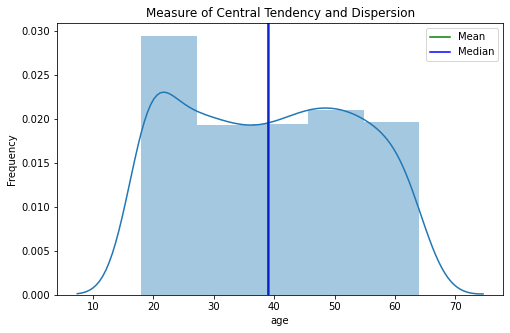

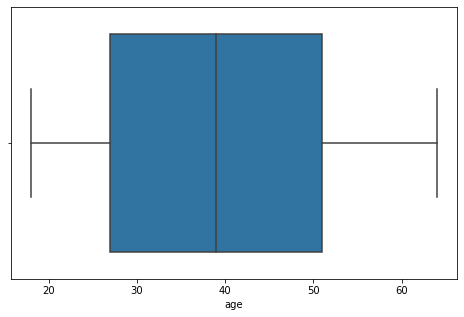

In [11]:
hist_box(data['age'],5,'age')

### Observation
1. There are no outliers within this variable. 
2. This variable has a bimodal distribution with two peaks
3. From boxplot we can see that the third quartile(Q3) is equal to 51 which means 75% of customers are below the age of 51.

### 1.6.2 Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (bmi)

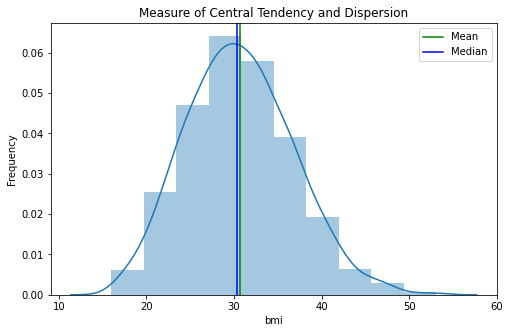

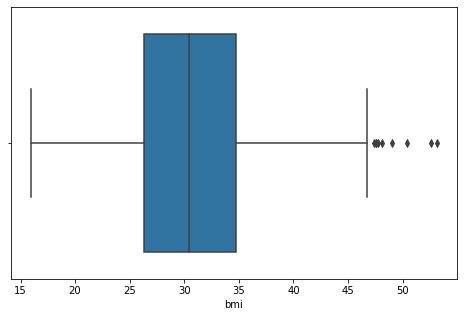

In [12]:
# Plot histogram and boxplot for bmi Variable
hist_box(data['bmi'], 10,'bmi')

### Observation
1. The average bmi of customers is about 31
2. There are some outliers on the higher end of this variable

### 1.6.3 Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (charges)

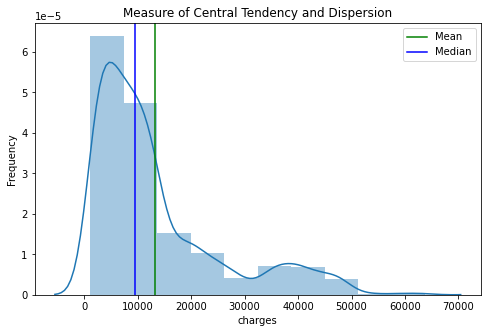

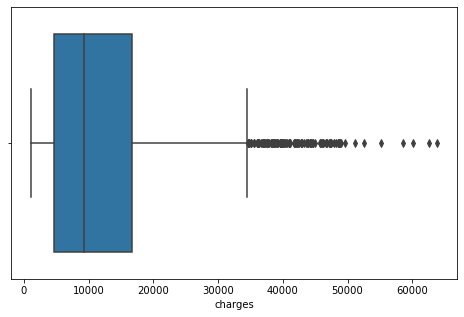

In [13]:
# Plot histogram and boxplot for charges Variable
hist_box(data['charges'], 10,'charges')

### Observation
1. The average charge for the insurance company's customers is 13,000
2. The charges variable is heavily right skewed
2. There are many outliers on the higher end of this variable

In [14]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

### 1.6.4 Visualization of Categorical Variables Using Barplot (sex)

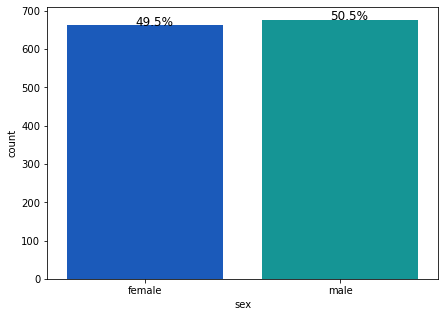

In [15]:
# Plot barplot for sex Variable
plt.figure(figsize=(7,5)) # set the figure size
ax = sns.countplot(data['sex'],palette='winter')
perc_on_bar(ax,data['sex'])

### Observation
1. As earlier mentioned, there are more male customers(50.5%) than female customers(49.5%)

### 1.6.5 Visualization of Categorical Variables Using Barplot (children)

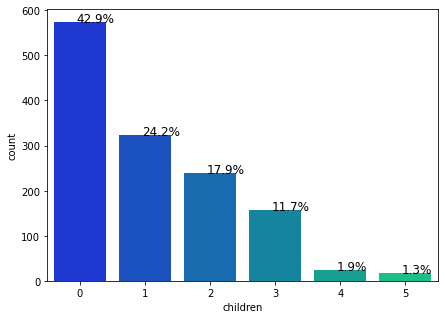

In [16]:
# Plot barplot for children Variable
plt.figure(figsize=(7,5)) # set the figure size
ax = sns.countplot(data['children'],palette='winter')
perc_on_bar(ax,data['children'])

### Observation
1. A large percentage of customers(42.9%) do not have dependents/children on the insurance plan with the next range being 24.2% of customers having just 1 dependent/child on the insurance plan

### 1.6.6 Visualization of Categorical Variables Using Barplot (smoker)

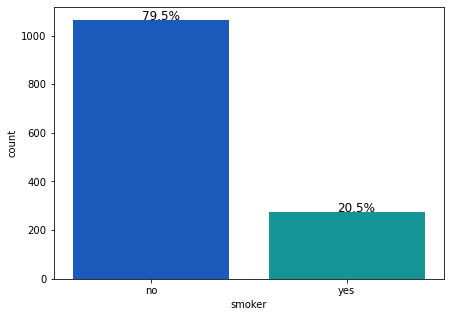

In [17]:
# Plot barplot for smoker Variable
plt.figure(figsize=(7,5)) # set the figure size
ax = sns.countplot(data['smoker'],palette='winter')
perc_on_bar(ax,data['smoker'])

### Observation
1. 79.5% of customers are smokers while 20.5% of customers are non-smokers

### 1.6.7 Visualization of Categorical Variables Using Barplot (region)

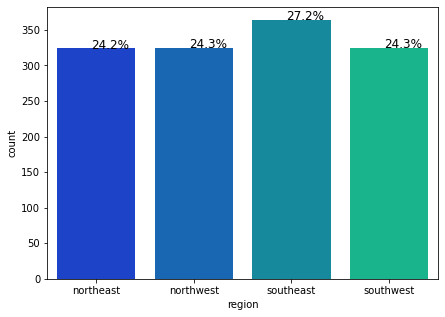

In [18]:
# Plot barplot for region Variable
plt.figure(figsize=(7,5)) # set the figure size
ax = sns.countplot(data['region'],palette='winter')
perc_on_bar(ax,data['region'])

### Observation
1. As earlier mentioned, customers are spread evenly amongst regions with southeast having a slight advantage(27.2%)

### 1.7 Feature Engineering

In [19]:
# Bin Ages variable to create Age Group variable
data['age_group'] = pd.cut(data.age, bins=[17,40,64], labels=['Young Adults','Adults'])

In [20]:
# Round up bmi score
data['bmi']= data['bmi'].round(1)

# Create Weight status variable using bmi score
data.loc[(data['bmi'] < 18.5),'weight_status']= 'Under Weight'
data.loc[(data['bmi'] >= 18.5) & (data['bmi'] <= 24.9), 'weight_status']= 'Healthy Weight'
data.loc[(data['bmi'] >= 25) & (data['bmi'] <= 29.9), 'weight_status']= 'Over Weight'
data.loc[(data['bmi'] >= 30),'weight_status']= 'Obese'

In [21]:
# Change datatypes
data['age_group'] = data['age_group'].astype('category') # Convert age_group from Object to Category datatype 
data['weight_status'] = data['weight_status'].astype('category') # Convert weight_status from Object to Category datatype 

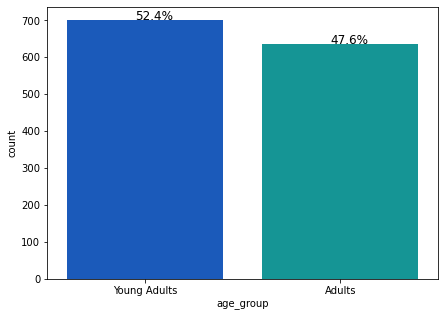

In [22]:
# Plot barplot for age_group Variable
plt.figure(figsize=(7,5)) # set the figure size
ax = sns.countplot(data['age_group'],palette='winter')
perc_on_bar(ax,data['age_group'])

### Observation
1. The young adults group make up 52.4% of the customer base while the Adults group make up 47.6%

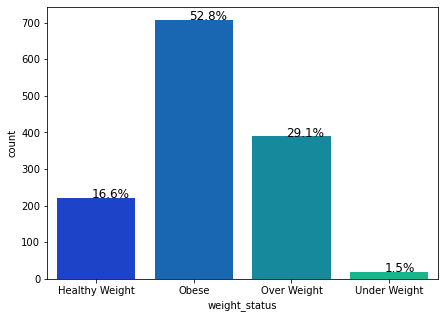

In [74]:
# Plot barplot for weight_status Variable
plt.figure(figsize=(7,5)) # set the figure size
ax = sns.countplot(data['weight_status'],palette='winter')
perc_on_bar(ax,data['weight_status'])

### Observation
1. The vast majority of customers fall into the obese category with 52.8%. 
2. Customers who are over weight make up 29.1%. 
3. Customer Customers with healthy weight make up 16.6%.
4. Customers who are under weight make up 1.5%

### 1.8 Exploratory Data Analysis (Bivariate Analysis)

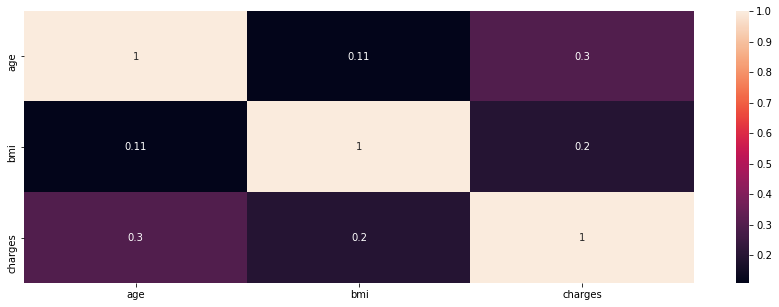

In [23]:
# Diaplay Heatmap of numerical variables
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

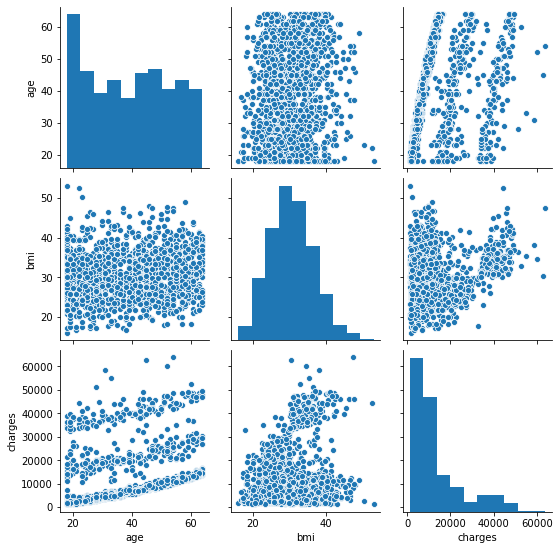

In [24]:
# Display pairplot of all numerical variables
sns.pairplot(data=data.drop(['children'],axis=1))
plt.show()

### Observations
1. The numerical variables within the dataset are not correlated with each other

### BMI vs Sex

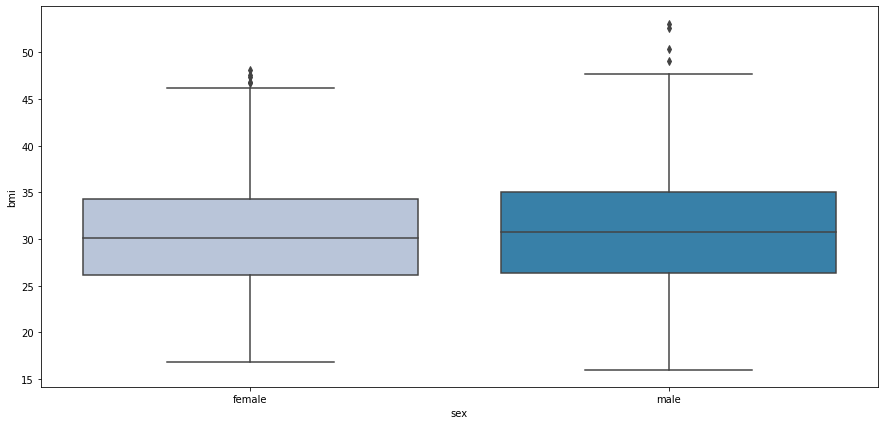

In [25]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["sex"],data["bmi"],palette="PuBu") #Plot boxplot
plt.show() #Display plot

### Observations
1. On average, the bmi score for male customers are slightly higher than that of female customers.
2. With an average bmi score of 31 for male customers and 30 for female customers, we can argue that the customers bmi scores fall within a high range

### Charges vs Sex

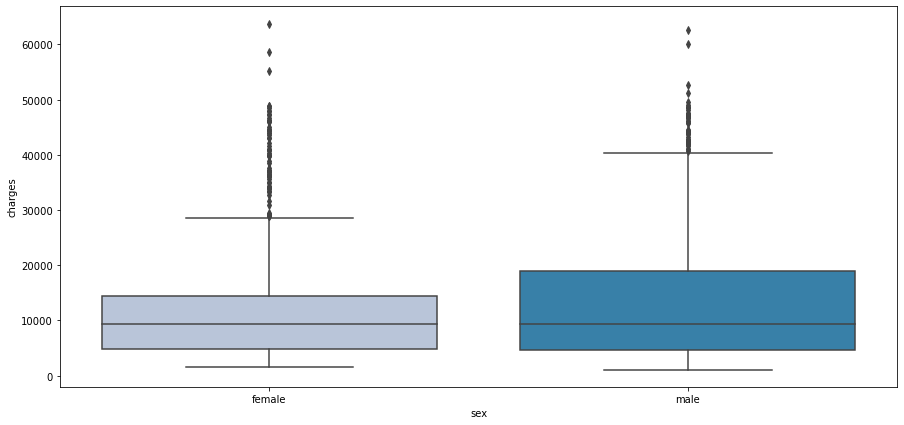

In [26]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["sex"],data["charges"],palette="PuBu") #Plot boxplot
plt.show() # Display plot

### Observations
1. Males bill more medical costs to health insurance than females
2. The average charge however for both male and female customers is about 10,000

### Children vs BMI

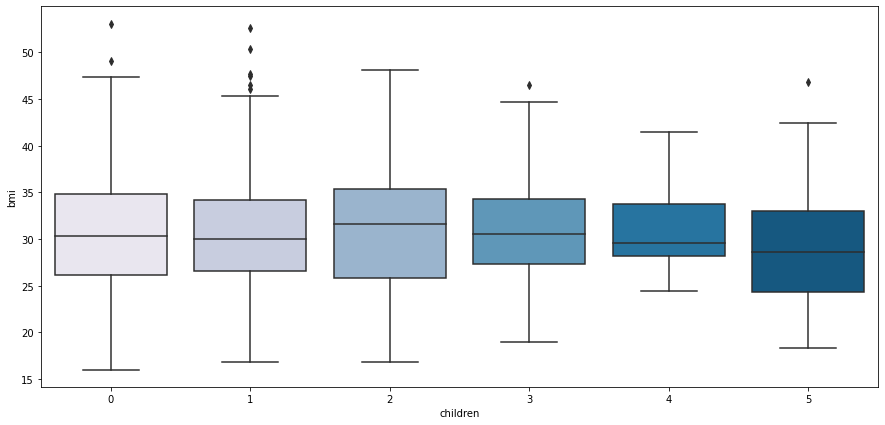

In [27]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["children"],data["bmi"],palette="PuBu") #Plot Boxplot
plt.show() #display plot

### Observations
1. Customers with 2 children on an insurance plan have the highest BMI Score.

### Children vs Charges

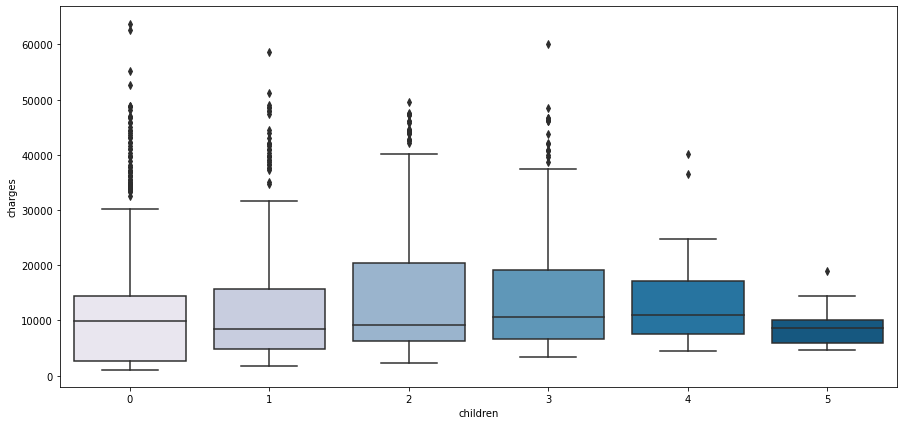

In [28]:
plt.figure(figsize=(15,7)) #Adjust Size
sns.boxplot(data["children"],data["charges"],palette="PuBu") #Plot boxplot
plt.show() #Display plot

### Observations
1. Customers with 2 children charge the most medical bills

### Smoker vs BMI

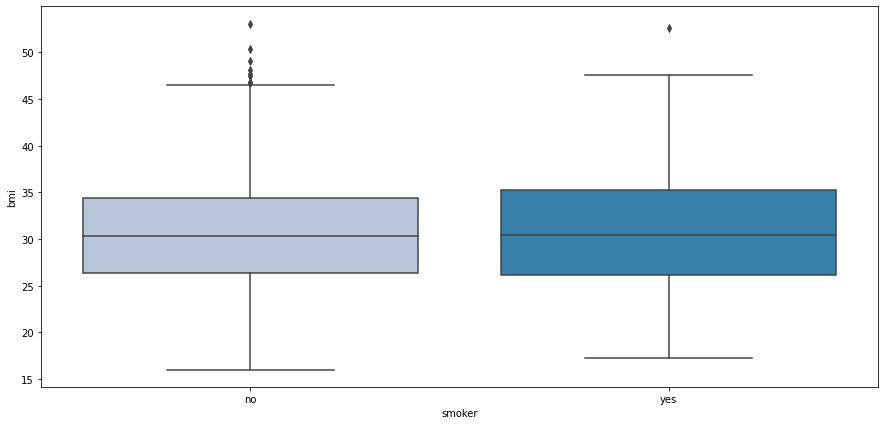

In [29]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["smoker"],data["bmi"],palette="PuBu") # Plot Boxplot
plt.show() #Display plot

### Observations
1. There is no significant difference in BMI score between customers that smoke and customers that do not smoke

### Smoker vs Charges

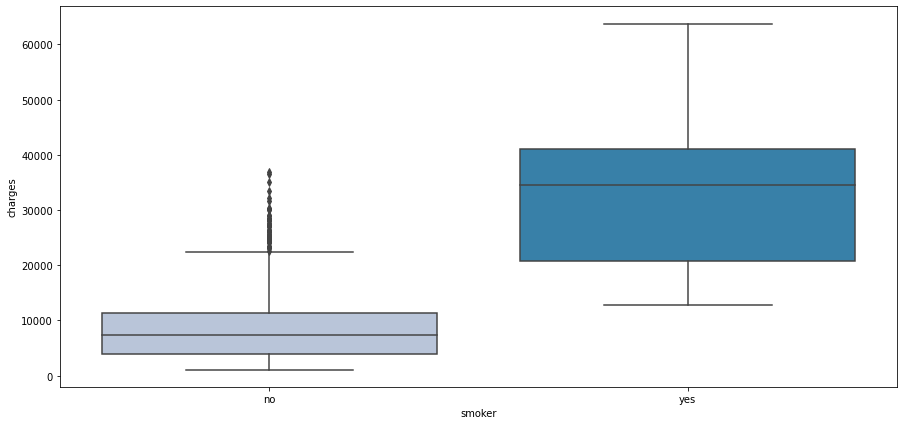

In [30]:
plt.figure(figsize=(15,7)) #Adjust size
sns.boxplot(data["smoker"],data["charges"],palette="PuBu") # Plot boxplot
plt.show() #Display Plot

### Observations
1. From the data, we can observe that customers medical costs billed to their health insurance plan is significantly larger when the customer is a smoker than when the customer isnt a smoker

### Region vs BMI

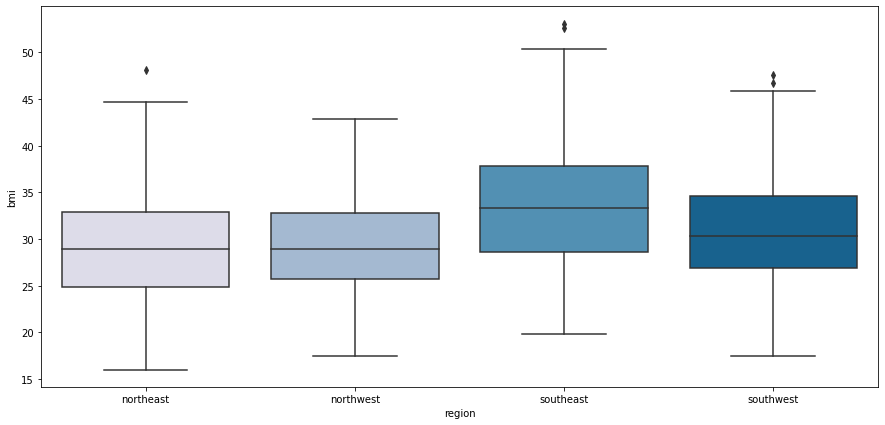

In [31]:
plt.figure(figsize=(15,7)) #Adjust size
sns.boxplot(data["region"],data["bmi"],palette="PuBu") #Plot boxplot
plt.show() #Display Plot

### Observations
1. On average, cutomers who live in the southeast region have the highest bmi score compared to customers who live in the other regions

### Region vs Charges

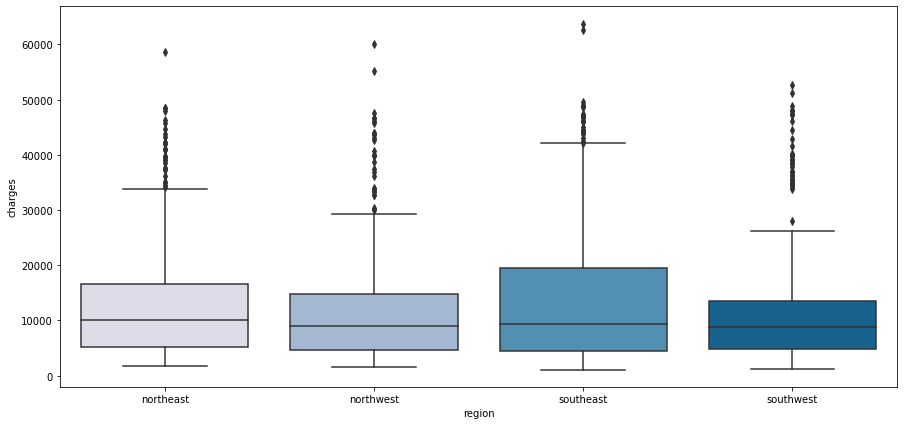

In [32]:
plt.figure(figsize=(15,7)) #Adjust Size
sns.boxplot(data["region"],data["charges"],palette="PuBu") #Plot boxplot
plt.show() #Display plot

### Observations
1. The average medical bill charged by customers in all regions is about 10,000. 
2. 75% of customers that live in the southeast region charge between 5,000 and 20,000 in medical bills 

### Age Group vs BMI 

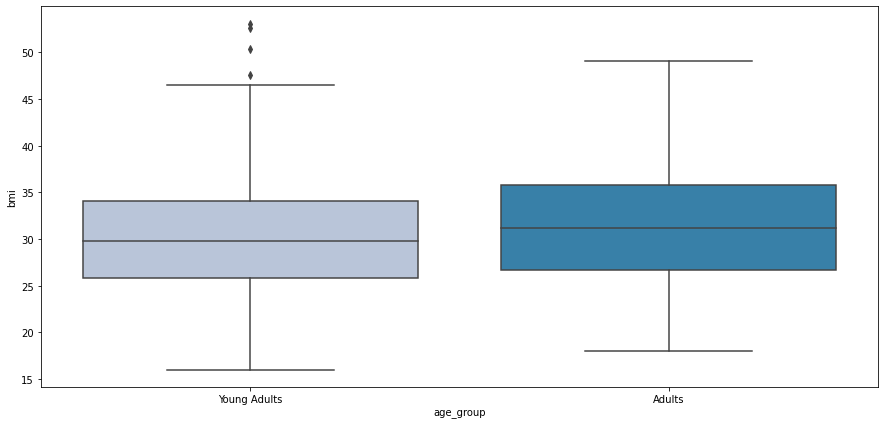

In [33]:
plt.figure(figsize=(15,7))# Adjust size
sns.boxplot(data["age_group"],data["bmi"],palette="PuBu") #Plot boxplot
plt.show() #Display plot

### Observations
1. Customers within the Adults (41-64) age group have a slightly higher BMI score than customers within the Young Adults (18-40) age group
2. There are however some outlier values within the Young Adults age group which goes as higher as 53 BMI score. 

### Age Group vs Charges

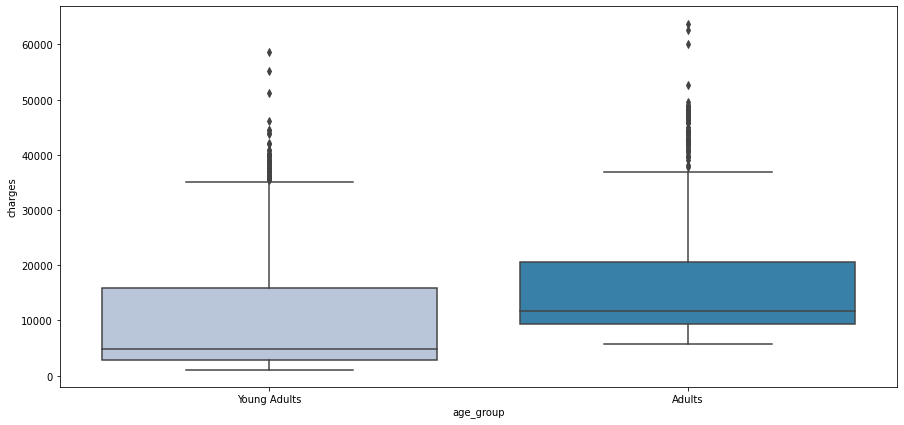

In [34]:
plt.figure(figsize=(15,7)) #Adjust size
sns.boxplot(data["age_group"],data["charges"],palette="PuBu") #Plot boxplot
plt.show() #Display plot

### Observations
1. An interesting observation is the medical bill charged by Young Adults being on average as low as 5,000. This is however not the case with Adults as the average charge is over 10,000

### Weight Status vs Charges

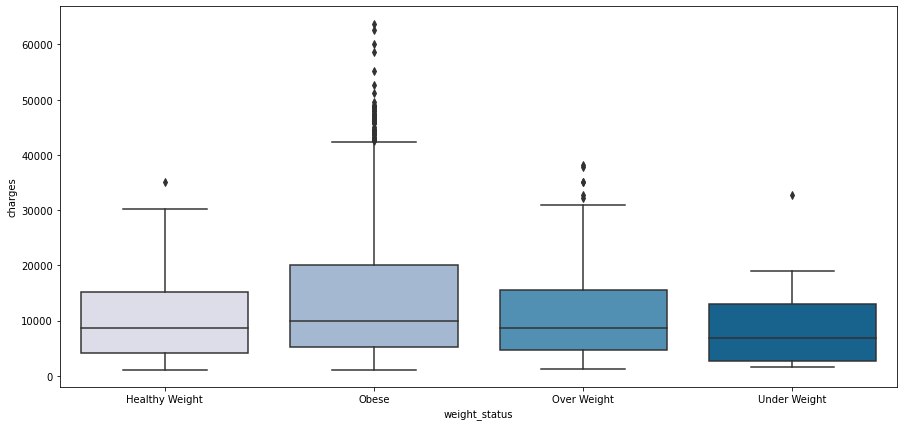

In [35]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["weight_status"],data["charges"],palette="PuBu") # Plot boxplot 
plt.show() #Display plot

### Observations
1. As expected, customers that are categorized as obese charge the highest medical bill to their health insurance.

### Sex vs Smoker

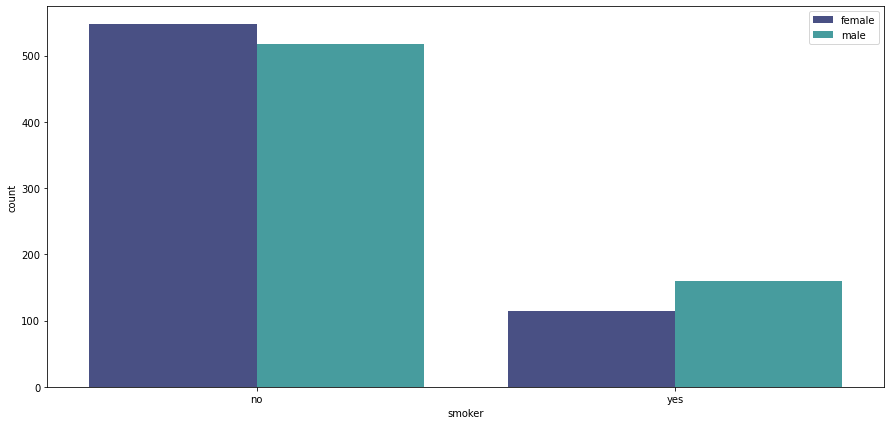

In [36]:
plt.figure(figsize=(15,7))# Adjust size
sns.countplot(data["smoker"],hue=data["sex"],palette="mako") #Plot barplot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observations
1. There are more male customers who smoke than female customers. 

### Sex vs Age Group

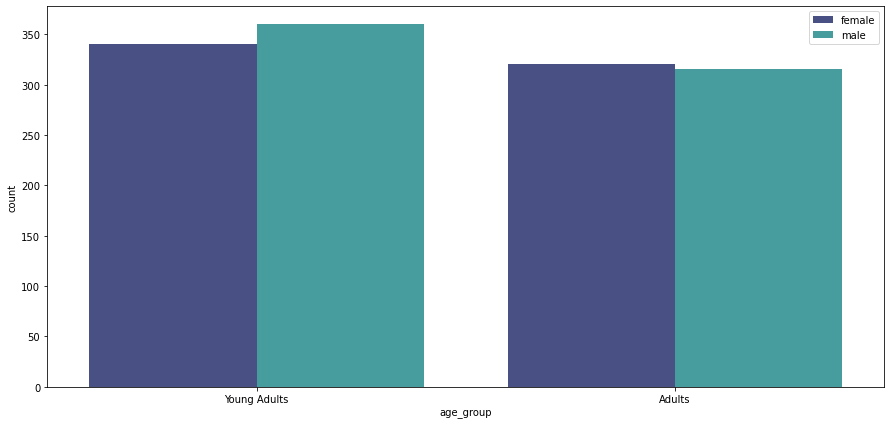

In [37]:
plt.figure(figsize=(15,7)) # Adjust size
sns.countplot(data["age_group"],hue=data["sex"],palette="mako") #Plot barplot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observations
1. There are more male young adult customers than female young adult customers on the flip side, there are slightly more female adult customers than male adult customers

### Sex vs Weight Status

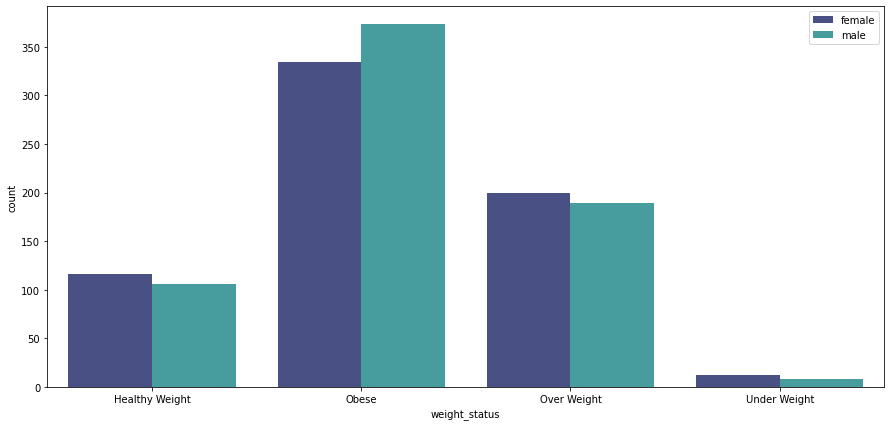

In [38]:
plt.figure(figsize=(15,7)) # Adjust size
sns.countplot(data["weight_status"],hue=data["sex"],palette="mako") #Plot barplot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observations
1. There are more female customers who have a healthy weight, are over weight and are also under weight than their male counterparts. However, there are more obese male customers than female customers

### Weight Status vs Age Group

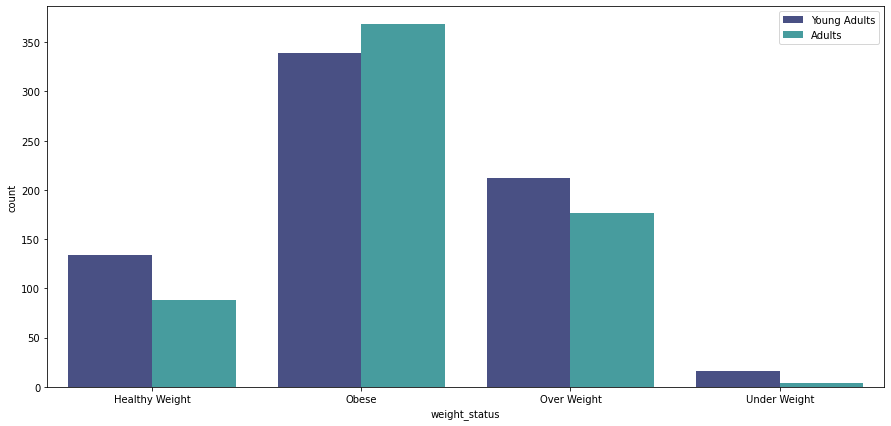

In [80]:
plt.figure(figsize=(15,7)) # Adjust size
sns.countplot(data["weight_status"],hue=data["age_group"],palette="mako") # Plot barplot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observations
1. There are more Young Adults who have a Healthy Weight than Adults
2. There is a larger frequency of Obese Adult customers than Young Adult customers
3. There are more Young Adults who are Over Weight than Adults
4. There are more Young Adults who are Under Weight than Adults

### 1.9 Exploratory Data Analysis (Multivariate Analysis)

### Smoker vs BMI vs Sex

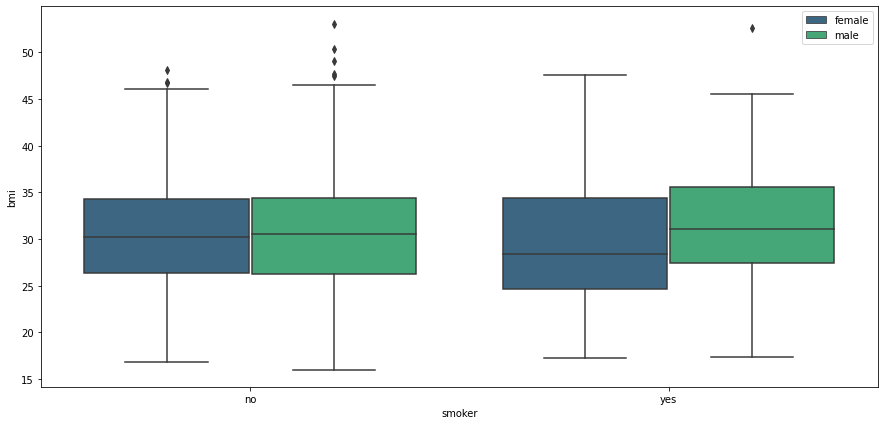

In [40]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["smoker"],data["bmi"],hue=data["sex"],palette="viridis") # Plot boxplot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observations
1. Male smokers have a higher bmi score than female smokers. 
2. There isnt a significant difference between the bmi scores of both male and female non-smokers

### Age Group vs Charges vs Children

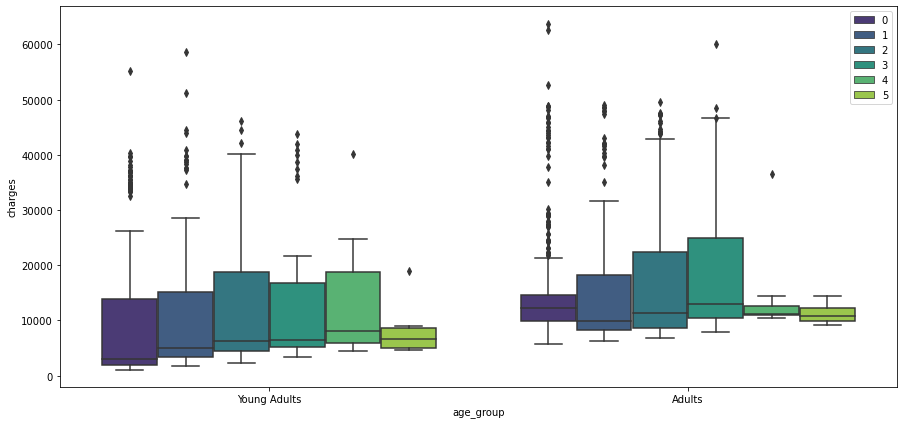

In [41]:
plt.figure(figsize=(15,7)) #Adjust size
sns.boxplot(data["age_group"],data["charges"],hue=data["children"],palette="viridis") #Plot boxplot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observations
1. As expected, Young Adults with no children on average, have the least charges to their health insurance. The average charge for Adults with no children goes up however as we have established that customers within this age_group rack up more charges than the younger age group

### Region vs Weight Status vs Charges

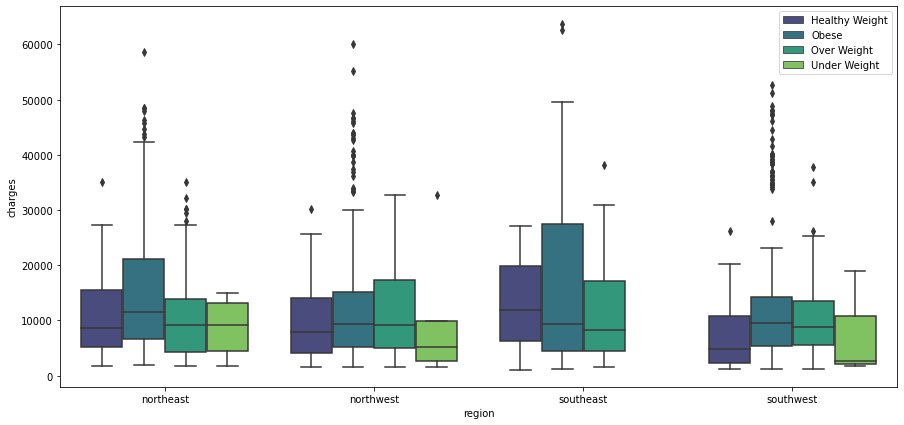

In [42]:
plt.figure(figsize=(15,7)) #Adjust size
sns.boxplot(data["region"],data["charges"],hue=data["weight_status"],palette="viridis") #Plot boxplot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observations
1. Most charges in the northeast come from customers categorized as Obese
2. There isnt a significant difference between charges made by Obese and Overweight customers in the northwest and southwest regions
3. In the southeast region, Customers who are of Healthy Weight charge the highest figures on average

### Smoker vs Weight Status vs Charges

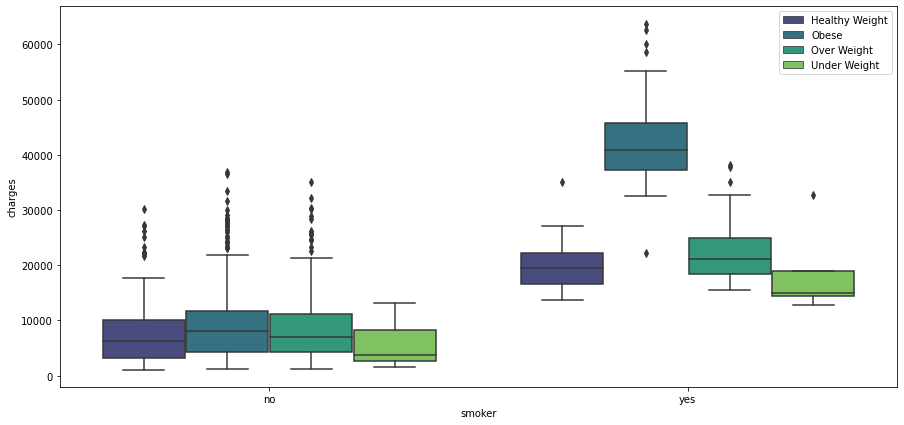

In [43]:
plt.figure(figsize=(15,7)) #Adjust size
sns.boxplot(data["smoker"],data["charges"],hue=data["weight_status"],palette="viridis") #Plot boxplot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observations
1. Obese and Overweight customers make up a large percentage of charges made for both smokers and non-smokers. There is however a large difference in charges made for Obese customers who don't smoke and for those who do smoke with Obese smokers charging as high as 40,000 on average to their Health Insurance

### Smoker vs BMI vs Charges

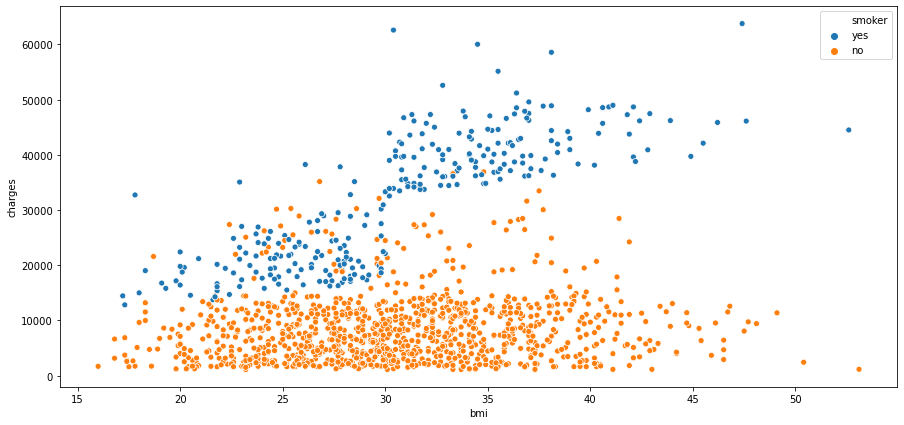

In [44]:
plt.figure(figsize=(15,7)) #Adjust size
sns.scatterplot(data["bmi"],data["charges"],hue=data["smoker"],ci=0) # Plot scatter plot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observations
1. From the data, we can see that there is a relationship between bmi score, charges and customers that are smokers. As the bmi score for a smoker increases, so do the medical charges to their health insurance. 


2. What is also interesting is that most non-smokers even with large bmi scores do not have a large medical charge to their health insurance expected, customers that are categorized as obese charge the highest medical bill to their health insurance.

### 1.10 Statistical Analysis

### Q1- Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't

- Step 1: Define the null and alternate hypotheses
      H0: Medical charges of smokers is less than or equal to non-smokers
      H1: Medical charges of smokers is greater than non-smokers

      - This would be a one-tailed test.
      - This is also a two sample test

- Step 2: Decide the significance level
      significance level = 0.05

- Step 3: Identify the test statistic
       We do not know the population standard deviation So we use the t distribution and the tSTAT test statistic.
        
- Step 4: Calculate the p - value and test statistic
       scipy.stats.ttest_ind calculates the t test for the mean of two samples given the sample observations. This function returns t-statistic and the p value for a one-tailed t-test. 
        
- Step 5: Make a decision
      Make decision to reject or fail to reject the null hypothesis
      
#### Assumptions
- Both samples are independent
- Data in each group must be obtained via a random sample from the population
- Data in each group are normally distributed
- Data values are continuous

In [45]:
charges_smoker = data.loc[(data['smoker'] == 'yes')]['charges'] # Charges of customers that smoke
charges_non_smoker = data.loc[(data['smoker'] == 'no')]['charges'] # Charges of customers that dont smoke
alpha = 0.05 # Significance level

In [46]:
# Two sample t-test
charges_tstat, charges_pvalue = ttest_ind(charges_smoker, charges_non_smoker) #Calculate test statistic and p-value
print('Two sample t test \nt statistic: {0} p value: {1} '.format(charges_tstat, charges_pvalue)) #Print statistic and p-value
one_tailed_pvalue = charges_pvalue/2 #Calculate one tailed p-value
print('One Tailed P_value: {0}'.format(one_tailed_pvalue)) #Print one tailed p-value

Two sample t test 
t statistic: 46.664921172723716 p value: 8.271435842177219e-283 
One Tailed P_value: 4.1357179210886093e-283


In [47]:
# Hypothesis Decision
if one_tailed_pvalue < alpha:
    print('Medical charges of smokers is greater than non-smokers')
else:
    print('Medical charges of smokers is less than or equal to non-smokers')

Medical charges of smokers is greater than non-smokers


### Q2- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

- Step 1: Define the null and alternate hypotheses
      H0: BMI of females is equal to the BMI of males
      H1: BMI of females is not equal to the BMI of males

      - This would be a two-tailed test.
      - This is also a two sample test

- Step 2: Decide the significance level
      significance level = 0.05

- Step 3: Identify the test statistic
       We do not know the population standard deviation So we use the t distribution and the tSTAT test statistic.
        
- Step 4: Calculate the p - value and test statistic
       scipy.stats.ttest_ind calculates the t test for the mean of two samples given the sample observations. This function returns t-statistic and the p value for a two-tailed t-test. 
        
- Step 5: Make a decision
      Make decision to reject or fail to reject the null hypothesis
      
#### Assumptions
- Both samples are independent
- Data in each group must be obtained via a random sample from the population
- Data in each group are normally distributed
- Data values are continuous

In [48]:
bmi_male = data.loc[(data['sex'] == 'male')]['bmi'] # BMI of male customers
bmi_female = data.loc[(data['sex'] == 'female')]['bmi'] # BMI of male customers
alpha = 0.05 # Significance level

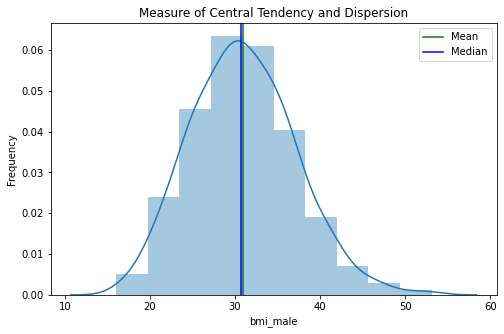

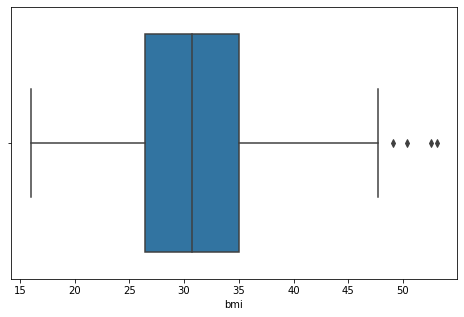

In [49]:
# Check distribution of bmi_male 
hist_box(bmi_male, 10,'bmi_male')

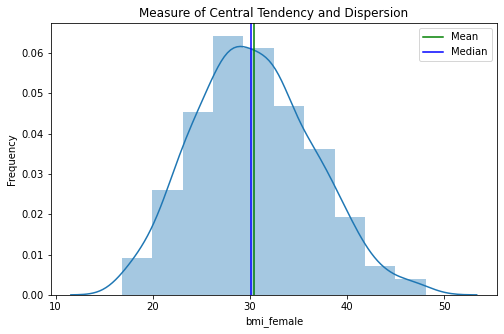

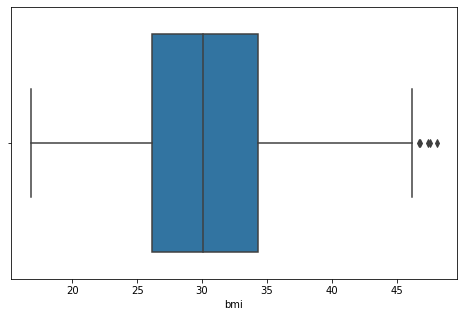

In [50]:
# Check distribution of bmi_female 
hist_box(bmi_female, 10,'bmi_female')

### Observation
- We have distributions that are well spread around the mean however, there are some outliers on the right end on both distributions. We would use IQR to remove the outliers

In [51]:
# Calculate IQR for bmi_male
Q1_m = bmi_male.quantile(0.25)
Q3_m = bmi_male.quantile(0.75)
IQR = Q3_m - Q1_m

# Calculate IQR for bmi_female
Q1_f = bmi_female.quantile(0.25)
Q3_f = bmi_female.quantile(0.75)
IQR = Q3_f - Q1_f

In [52]:
# Filter out the outliers by keeping only valid bmi_male values
bmi_male_trans = bmi_male[~((bmi_male < (Q1_m - 1.5 * IQR)) |(bmi_male > (Q3_m + 1.5 * IQR)))]

# Filter out the outliers by keeping only valid bmi_female values
bmi_female_trans = bmi_female[~((bmi_female < (Q1_f - 1.5 * IQR)) |(bmi_female > (Q3_f + 1.5 * IQR)))]

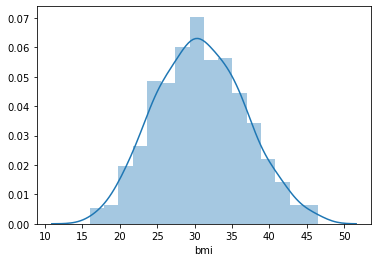

In [53]:
# plot bmi_male_trans to check for normality
sns.distplot(bmi_male_trans)

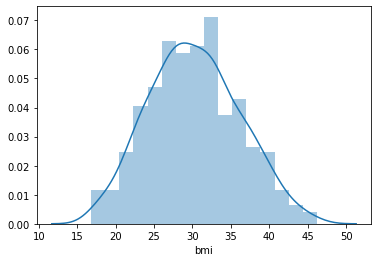

In [54]:
# plot bmi_female_trans to check for normality
sns.distplot(bmi_female_trans)

In [55]:
# Two sample t-test
bmi_tstat, bmi_pvalue = ttest_ind(bmi_male_trans, bmi_female_trans) #Calculate test statistic and p-value
print('Two sample t test \nt statistic: {0} p value: {1} '.format(bmi_tstat, bmi_pvalue)) #print test statistic and p-value

Two sample t test 
t statistic: 1.6229165574072335 p value: 0.10484512250161868 


In [56]:
# Hypothesis Decision
if bmi_pvalue < alpha:
    print('BMI of females is not equal to the BMI of males')
else:
    print('BMI of females is equal to the BMI of males')

BMI of females is equal to the BMI of males


### Q3 Is the proportion of smokers significantly different across different regions? 

- Step 1: Define the null and alternate hypotheses
      H0: There is no significant difference in the proportion of smokers across different regions
      H1: There is a statistically significant difference in the proportion of smokers across different regions

      - A chi-squared test would be used 

- Step 2: Decide the significance level
      significance level = 0.05

- Step 3: Identify the test statistic
      Calculate the test statistic using (O - E)2 / E formula
      
- Step 4: Calculate the p - value and test statistic
       Find the critical values and identify the p-value using chi2.cdf() function
       
- Step 5: Make a decision
      Make decision to reject or fail to reject the null hypothesis
      

In [57]:
smoker_region = pd.crosstab(data['region'], data['smoker']) #Crosstab to group region and smoker data
smoker_region

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [58]:
#Observed values
observed_values = smoker_region.values
print('Observed Values: \n', observed_values)

Observed Values: 
 [[257  67]
 [267  58]
 [273  91]
 [267  58]]


In [59]:
# Calculate chi-square statistic, p-value, degree of freedom, and expected values
chi = stats.chi2_contingency(smoker_region)
print('Chi-Squared Statistic, P-value, Degree of Freedom, Expected Values', chi)

Chi-Squared Statistic, P-value, Degree of Freedom, Expected Values (7.343477761407071, 0.06171954839170541, 3, array([[257.65022422,  66.34977578],
       [258.44544096,  66.55455904],
       [289.45889387,  74.54110613],
       [258.44544096,  66.55455904]]))


In [60]:
# Expected Values
expected_values = chi[3]
expected_values

array([[257.65022422,  66.34977578],
       [258.44544096,  66.55455904],
       [289.45889387,  74.54110613],
       [258.44544096,  66.55455904]])

In [61]:
# Calculate Degree of Freedom
no_of_rows = len(smoker_region.iloc[0:4,0])
no_of_columns = len(smoker_region.iloc[0,0:4])
dof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",dof)
alpha= 0.05

Degree of Freedom: 3


In [62]:
# Calculate chi-square statistic
chi_square = sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_statistic = chi_square[0] + chi_square[1]
print("chi-square statistic:",chi_square_statistic)

chi-square statistic: 7.34347776140707


In [63]:
# Find critical values
critical_value = chi2.ppf(q=1-alpha, df=dof)
print("critical_value:", critical_value)

critical_value: 7.814727903251179


In [64]:
# P_value
chi_pvalue = 1-chi2.cdf(x=chi_square_statistic,df=dof)
print('P-value:', chi_pvalue)
print('Chi-Square Statistic:', chi_square_statistic)
print('Significant level:', alpha)
print('Degree of Freedom:', dof)

P-value: 0.06171954839170546
Chi-Square Statistic: 7.34347776140707
Significant level: 0.05
Degree of Freedom: 3


In [65]:
# Hypothesis Decision
if chi_pvalue < alpha:
    print('There is a statistically significant difference in the proportion of smokers across different regions')
else:
    print('There is no significant difference in the proportion of smokers across different regions')

There is no significant difference in the proportion of smokers across different regions


### Q4 Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

- Step 1: Define the null and alternate hypotheses
      H0: The mean bmi of women with no children, one child and two children are the same
      H1: There is a difference in at least one of the mean bmi of women with no children, one child and two children 
      
- Step 2: Check for normality using Shapiro test


- Step 3: Check for the equality of variances using Levenes test
    This is done to prove that all variances are equal as assumed by ANOVA test
    

- Step 4: Decide the significance level
      significance level = 0.05
      
      
- Step 5: Calculate the p - value and test statistic
       - ANOVA uses F-Tests to statistically test the equality of means
       - Perform the ANOVA test using stats.f_oneway function
       
       
- Step 5: Make a decision
      Make decision to reject or fail to reject the null hypothesis
      
      
- Step 6: If we reject the null hypothesis, use Tukey-Kramers Post-Hoc test to find out which of the groups are different.

In [66]:
# Filter BMI of females with 0, 1 and 2 children on the insurance plan 
sf= data[(data['sex'] == 'female') & (data['children'] != 3) & (data['children'] != 4) & (data['children'] != 5)] 
bmi_zero_children = sf[sf['children'] == 0]['bmi']
bmi_one_child = sf[sf['children'] == 1]['bmi']
bmi_two_children = sf[sf['children'] == 2]['bmi']

In [67]:
# Calculate IQR for bmi_zero_children
Q1_zero = bmi_zero_children.quantile(0.25)
Q3_zero = bmi_zero_children.quantile(0.75)
IQR = Q3_zero - Q1_zero
print(IQR)

# Filter out the outliers by keeping only valid bmi_zero_children values
bmi_zero_children_trans = bmi_zero_children[~((bmi_zero_children < (Q1_zero - 1.5 * IQR)) |(bmi_zero_children > (Q3_zero + 1.5 * IQR)))]


# Calculate IQR for bmi_one_child
Q1_one = bmi_one_child.quantile(0.25)
Q3_one = bmi_one_child.quantile(0.75)
IQR = Q3_one - Q1_one
print(IQR)

# Filter out the outliers by keeping only valid bmi_one_child values
bmi_one_child_trans = bmi_one_child[~((bmi_one_child < (Q1_one - 1.5 * IQR)) |(bmi_one_child > (Q3_one + 1.5 * IQR)))]


# Calculate IQR for bmi_two_children
Q1_two = bmi_two_children.quantile(0.25)
Q3_two = bmi_two_children.quantile(0.75)
IQR = Q3_two - Q1_two
print(IQR)

# Filter out the outliers by keeping only valid bmi_two_children values
bmi_two_children_trans = bmi_two_children[~((bmi_two_children < (Q1_one - 1.5 * IQR)) |(bmi_two_children > (Q3_one + 1.5 * IQR)))]

8.400000000000002
8.000000000000007
9.0


#### Hypothesis to test for distribution normality using Shapiro test
H0: Sample is normally distributed.

H1: Sample is not normally distributed

In [68]:
# Function to test for distribution normality using Shapiro test 
def shapiro_test(data):
    from scipy.stats import shapiro
    shapiro_stat, shapiro_pvalue = shapiro(data)
    print('Statistic: {0} P-value: {1} '.format(shapiro_stat, shapiro_pvalue))
    alpha = 0.05
    
    if shapiro_pvalue < alpha:
        print('Sample is not normally distributed')
    else:
        print('Sample is normally distributed')

In [69]:
# Test if BMI of females with zero children is normally distributed using Shapiro Test
shapiro_test(bmi_zero_children_trans)

Statistic: 0.9893696904182434 P-value: 0.03359442576766014 
Sample is not normally distributed


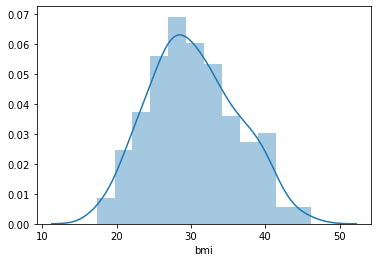

In [70]:
# View distribution of bmi_zero_children_trans
sns.distplot(bmi_zero_children_trans)

In [71]:
# Test if BMI of females with one child is normally distributed using Shapiro Test
shapiro_test(bmi_one_child_trans)

Statistic: 0.9934276342391968 P-value: 0.6986741423606873 
Sample is normally distributed


In [72]:
# Test if BMI of females with two children is normally distributed using Shapiro Test
shapiro_test(bmi_two_children_trans)

Statistic: 0.9882277846336365 P-value: 0.40858975052833557 
Sample is normally distributed


### Observation
- BMI of females with one child and BMI of females with two children are normally distributed 
- BMI of females with zero children failed the normality test. However, after plotting the distplot to visualize the distribution, we can see that it is normal-like. Therefore, we will go ahead with the ANOVA test using the distribution as-is

#### Hypothesis to test for equality of distributions variances
H0: All of the sample populations have equal variances.

H1: At least one of the sample population variances is not equal to the rest.

In [75]:
# Function to test whether or not BMI of females with zero children, BMI of females with one child and BMI of females with two children come from populations with equal variances using levene's test
def levene_test(data1,data2,data3):
    from scipy.stats import levene
    levene_stat, levene_pvalue = levene(data1,data2,data3)
    print('Statistic: {0} P-value: {1} '.format(levene_stat, levene_pvalue))
    alpha = 0.05
    
    if levene_pvalue < alpha:
        print('At least one of the sample population variances is not equal to the rest.')
    else:
        print('All of the sample populations have equal variances.')

In [76]:
# Perform levenes test using function
levene_test(bmi_zero_children_trans, bmi_one_child_trans, bmi_two_children_trans)

Statistic: 0.6323775849781584 P-value: 0.5317066906367219 
All of the sample populations have equal variances.


### Observation
- Our 3 samples have equal variances. 

In [77]:
# Perform the ANOVA test using stats.f_oneway function
anova_fstat, anova_pvalue = stats.f_oneway(bmi_zero_children_trans,bmi_one_child_trans,bmi_two_children_trans) #Calculate test statistic and p-value
print('F statistic: {0} P-value: {1} '.format(anova_fstat, anova_pvalue)) #Print test statistic and p-value

F statistic: 0.22515451072572923 P-value: 0.798465217985019 


In [78]:
# Hypothesis Decision
if anova_pvalue < alpha:
    print('There is a difference in at least one of the mean bmi of women with no children, one child and two children ')
else:
    print('The mean bmi of women with no children, one child and two children are the same')

The mean bmi of women with no children, one child and two children are the same


In [79]:
# Validate result
print('Mean BMI of females with zero children:',round(bmi_zero_children_trans.mean()))
print('Mean BMI of females with one child:',round(bmi_one_child_trans.mean()))
print('Mean BMI of females with two children:',round(bmi_two_children_trans.mean()))

Mean BMI of females with zero children: 30
Mean BMI of females with one child: 30
Mean BMI of females with two children: 30


### Conclusion

#### Q1 - Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't

- Define the null and alternate hypotheses
      H0: Medical charges of smokers is less than or equal to non-smokers
      H1: Medical charges of smokers is greater than non-smokers
      
   
- Significance Level : 0.05

   
- Results


          Statistic: 46.664921172723716
   
          P-Value: 4.1357179210886093e-283
   
   
- We would go ahead and reject the null hypothesis because the P-value is less than the significance level which means that there is evidence in the data to suggest that Medical charges of smokers is greater than non-smokers



#### Q2- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

-  Define the null and alternate hypotheses
      H0: BMI of females is equal to the BMI of males
      H1: BMI of females is not equal to the BMI of males
      
   
- Significance Level : 0.05

   
- Results


          Statistic: 1.6229165574072335
   
          P-Value: 0.10484512250161868
   
   
- We would go ahead and fail to reject the null hypothesis because the P-value is greater than the significance level which means that there is evidence in the data to suggest that BMI of females is equal to the BMI of males



#### Q3 Is the proportion of smokers significantly different across different regions? 

- Define the null and alternate hypotheses
      H0: There is no significant difference in the proportion of smokers across different regions
      H1: There is a statistically significant difference in the proportion of smokers across different regions
      
      
- Significance Level : 0.05

   
- Results


          Statistic: 7.34347776140707
   
          P-Value: 0.06171954839170546
   
   
- We would go ahead and fail to reject the null hypothesis because the P-value is greater than the significance level which means that there is evidence in the data to suggest that there is no significant difference in the proportion of smokers across different regions




#### Q4 Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

- Define the null and alternate hypotheses
      H0: The mean bmi of women with no children, one child and two children are the same
      H1: There is a difference in at least one of the mean bmi of women with no children, one child and two children 
      
      
- Significance Level : 0.05

   
- Results


          Statistic: 0.22515451072572923
   
          P-Value: 0.798465217985019
   
   
- We would go ahead and fail to reject the null hypothesis because the P-value is greater than the significance level which means that there is evidence in the data to suggest that the mean bmi of women with no children, one child and two children are the same
      
      
      
 